<b>Question:</b><br>
Given a set of two dimensional points P (e.g. [(1.1, 2.5), (3.4,1.9)...]; the size of set can be100s), write a function that calculates simple K-means. The expected returned value from the function is <br>
1) a set of cluster id that each point belongs to, and <br>
2) coordinates of centroids at the end of iteration.

# K-means clustering Algorithm
K-means clustering is an iterative algorithm which tries to find k-clusers with cluster heads, where each data point belong only to 1 cluster head and Mean of the data points from the centroid should be minimum.

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import seaborn as sns

# ------- Within Time limit -------

# k-means function

In [13]:
def distance_tuples(x,y):
    """
    This function returns distance between two coordinates
    x,y: n dimentional Tuples
    """
    sum_sq = 0
    for i in range(len(x)):
        sum_sq += (x[i]-y[i])**2
    return math.sqrt(sum_sq)


def find_closest(x, centroids):
    """
    This function returns index of the closest centroid 
    x: Tuple containing coordinates of a point
    centroids: List of tuples
    """
    for i in range(len(centroids)):
        if i == 0:
            min_dist = distance_tuples(x,centroids[i])
            cent = i
        else:
            dist = distance_tuples(x,centroids[i])
            if dist<min_dist:
                cent = i
                min_dist = dist
    return cent


def find_center(data):
    """
    This function returns centroid for a list of data points
    data: list of tuples
    """
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    return (x,y)


def centroid_compare(centroids, new_centroids, limit=0.1):
    """
    This function checks the convergence of the centroid
    centroids: Old Centroid
    new_centroids: New centroid
    """
    for i in range(len(centroids)):
        dis = distance_tuples(centroids[i], new_centroids[i])
        if dis==dis:
            dis = distance_tuples(centroids[i], new_centroids[i])
            if dis>limit:
                return 0
    return 1


def k_means_function(data, k, iterations, plot=True):
    """
    seperates data into different clusters
    data: list of tuples
    k: number of clusters
    iterations: iterations for centroid initializations
    plot: True if you want to see the plot 
    """
    print(f"{k} means clustering")
    
    # Convert datapoints into a dataframe
    df = pd.DataFrame(data, columns =['x', 'y'])
    
    df['cluster_final'] = None
    for ite in range(iterations):
        
        # Get a sample of random centroids from data
        centroids = random.sample(data, k=k)
        
        while(True):
            # create clusters based on centroids
            df['new_cluster'] = df.apply(lambda row: find_closest((row['x'], row['y']), centroids), axis=1)
            
            # New centroids based on cluster
            new_centroids = []
            for i in range(len(centroids)):
                x_mean = df[df['new_cluster']==i].x.mean()
                y_mean = df[df['new_cluster']==i].y.mean()
                new_centroids.append((x_mean, y_mean))
            df['new_dist'] = df.apply(lambda row: distance_tuples((row['x'], row['y']),
                                                                  centroids[int(row['new_cluster'])]), axis=1)
            if centroid_compare(centroids, new_centroids):
                centroids = new_centroids
                df['cluster'] = df['new_cluster']
                df['dist'] = df['new_dist']
                break  
            centroids = new_centroids
            df['cluster'] = df['new_cluster']
            df['dist'] = df['new_dist']

        dis_sum = df.groupby(['cluster']).sum()["dist"].mean()
        if ite==0:
            dis_sum_final = dis_sum
            df['cluster_final'] = df['cluster']
            df['dist_final'] = df['dist']
        elif dis_sum_final>dis_sum:
            dis_sum_final = dis_sum
            df['cluster_final'] = df['cluster']
            df['dist_final'] = df['dist']
#     print(dis_sum_final)
    if plot and len(data[0])==2:
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.scatterplot(data=df, x="x", y="y", hue="cluster_final", s=50, palette = "pastel", alpha=1)
        plt.title(f'{k}-means culstering',fontsize=15)
        plt.xlabel('x-coordinate',fontsize=15)
        plt.ylabel('y-coordinate',fontsize=15)
        plt.show()
    return df

In [3]:
# Sample Data set
data = [(1, 5), (12, 5), (10, 1), (4, 8), (10, 6), (12, 7), (13, 4), (11, 4), (21, 12), (8, 4), (3, 2),
       (20, 7), (23, 8), (9, 6), (11, 6), (1, 5), (3, 8),]

3 means clustering


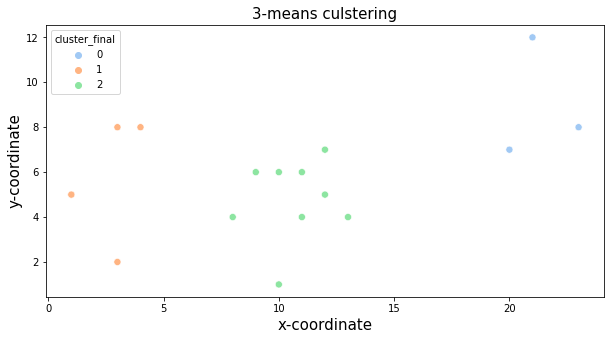

In [12]:
df_output = k_means_function(data, 3, 10, plot=True)

# Finding optimal k: Elbow Method
We will be plotting results for various different values of k and find out the optimal value result visually 

In [7]:
def elbow_method(data, iterations):
    sum_val = []
    for k in range(1,10):
        df = k_means_function(data, k, iterations, plot=False)
        sum_val.append(df.groupby(['cluster_final']).sum()["dist_final"].mean())
    fig, ax = plt.subplots(figsize=(10, 4))
    plt.plot(list(range(1,10)), sum_val, 'bx-')
    plt.xlabel('Values of K',fontsize=15)
    plt.ylabel('Distortion',fontsize=15)
    plt.title('The Elbow Method',fontsize=15)
    print("Elbow method")

1 means clustering
2 means clustering
3 means clustering
4 means clustering
5 means clustering
6 means clustering
7 means clustering
8 means clustering
9 means clustering
Elbow method


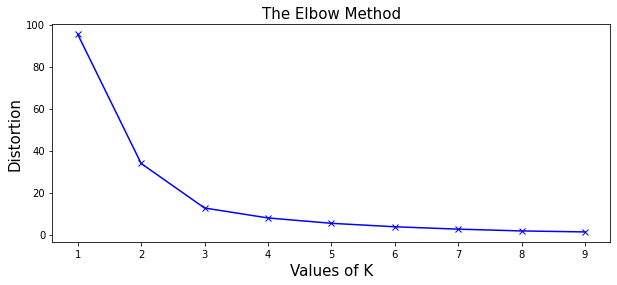

In [8]:
elbow_method(data, 100)